<a href="https://colab.research.google.com/github/MustakimRifat/Thesis/blob/main/Forecasting_Dengue_Cases_In_Bangladesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression - Training Mean Squared Error: 152468.42477723735, Training R^2 Score: 0.2597287281838708
Linear Regression - Testing Mean Squared Error: 101685.08652157005, Testing R^2 Score: 0.4515335930240242


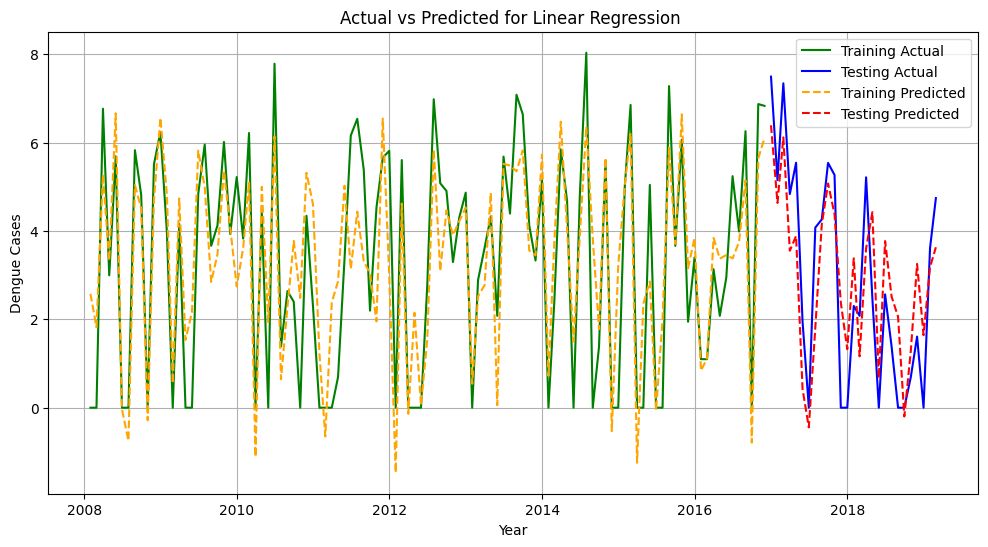

Ridge Regression - Training Mean Squared Error: 151420.93095520078, Training R^2 Score: 0.2648145653661693
Ridge Regression - Testing Mean Squared Error: 100494.55290636688, Testing R^2 Score: 0.4579550626480491


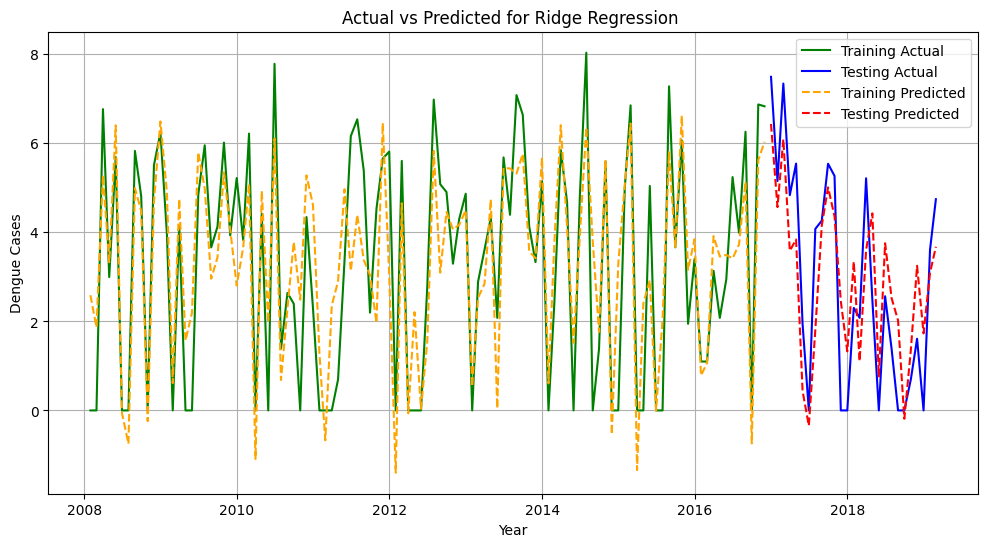

Decision Tree Regression - Training Mean Squared Error: 0.0, Training R^2 Score: 1.0
Decision Tree Regression - Testing Mean Squared Error: 79715.37037037045, Testing R^2 Score: 0.5700332835088668


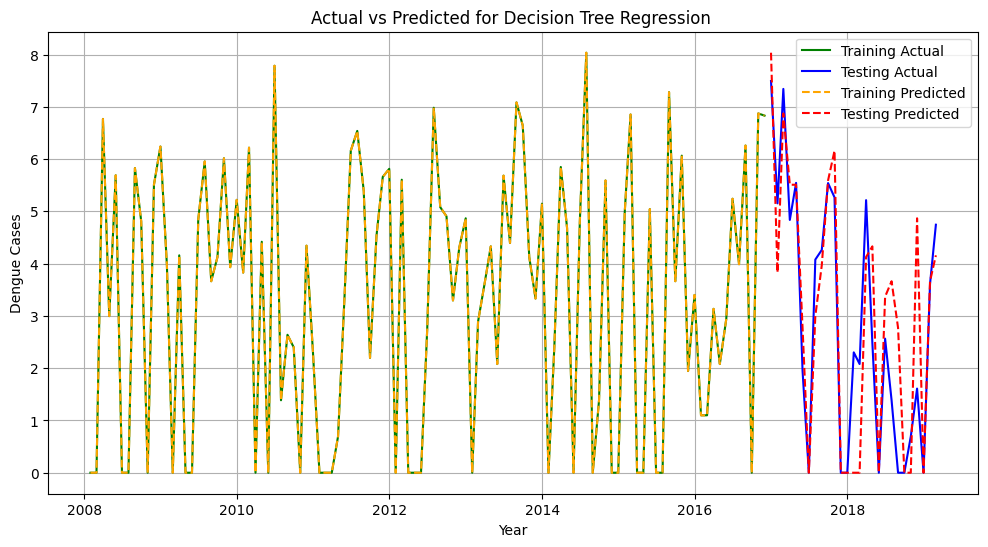

Support Vector Regression - Training Mean Squared Error: 157616.03282824068, Training R^2 Score: 0.23473583956254052
Support Vector Regression - Testing Mean Squared Error: 152721.85183039904, Testing R^2 Score: 0.17625279964365226


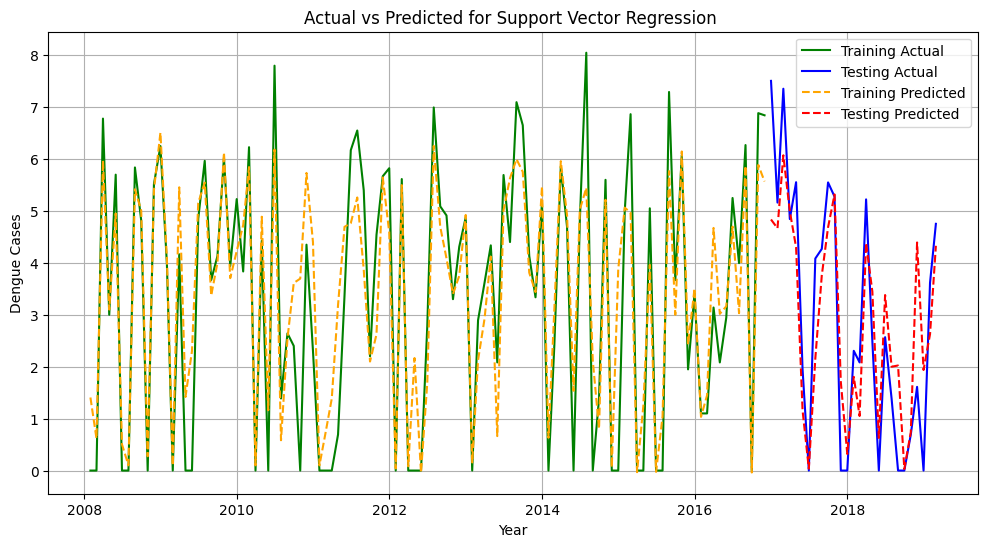

Random Forest Regression - Training Mean Squared Error: 43824.49127473871, Training R^2 Score: 0.7872214398486455
Random Forest Regression - Testing Mean Squared Error: 28274.32451911101, Testing R^2 Score: 0.8474946748913863


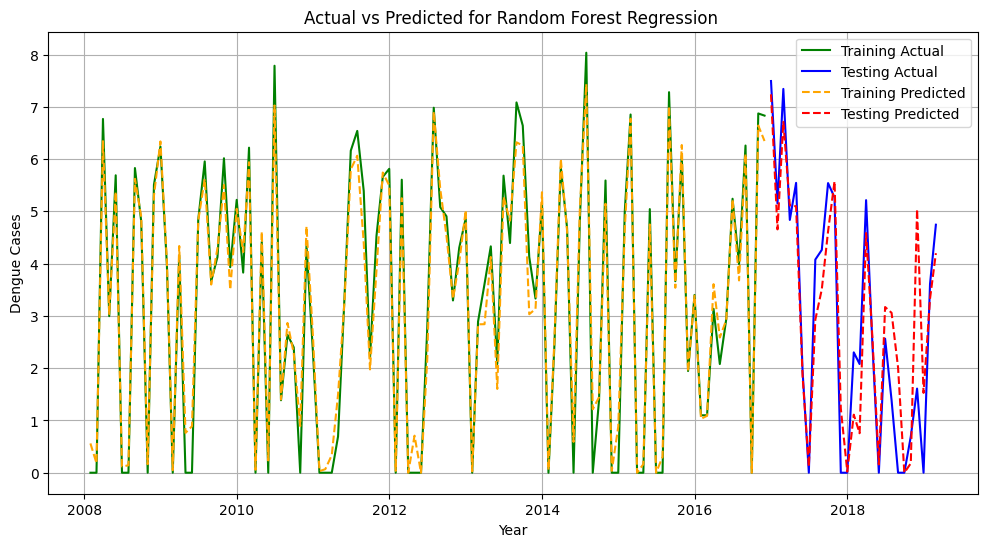

Polynomial Regression - Training Mean Squared Error: 101639.12544384012, Training R^2 Score: 0.5065173345332312
Polynomial Regression - Testing Mean Squared Error: 118966.13891076947, Testing R^2 Score: 0.3583234966677875


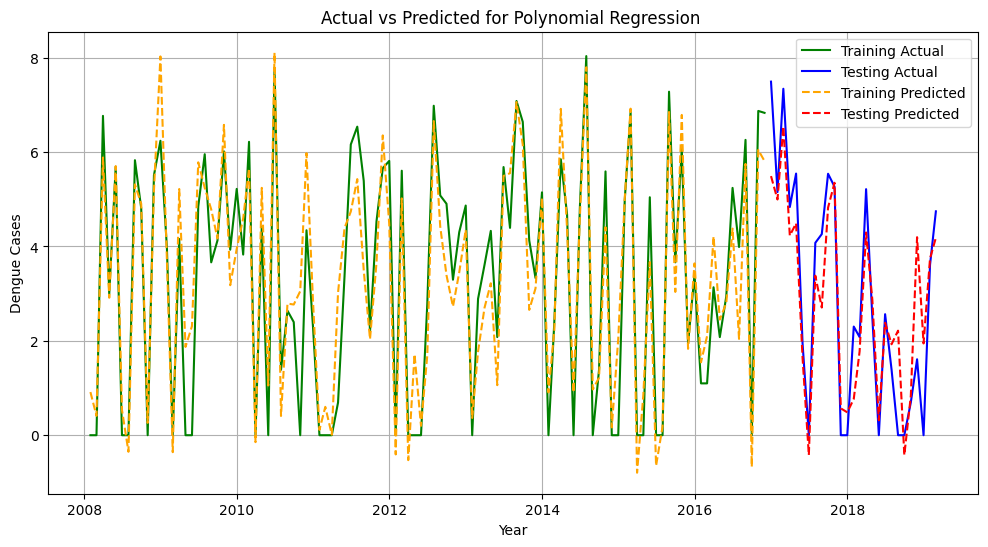

Gradient Boosting Regression - Training Mean Squared Error: 4841.8287359127935, Training R^2 Score: 0.9764917442973075
Gradient Boosting Regression - Testing Mean Squared Error: 57407.77029856026, Testing R^2 Score: 0.6903554436030849


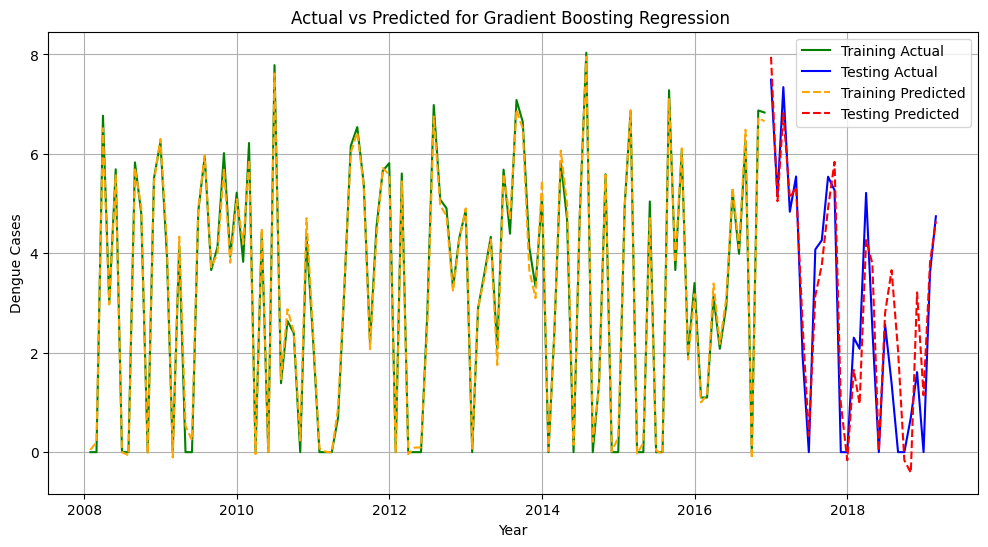

AdaBoost Regression - Training Mean Squared Error: 106386.55133085644, Training R^2 Score: 0.48346742761401795
AdaBoost Regression - Testing Mean Squared Error: 81901.7963476787, Testing R^2 Score: 0.5582401952506512


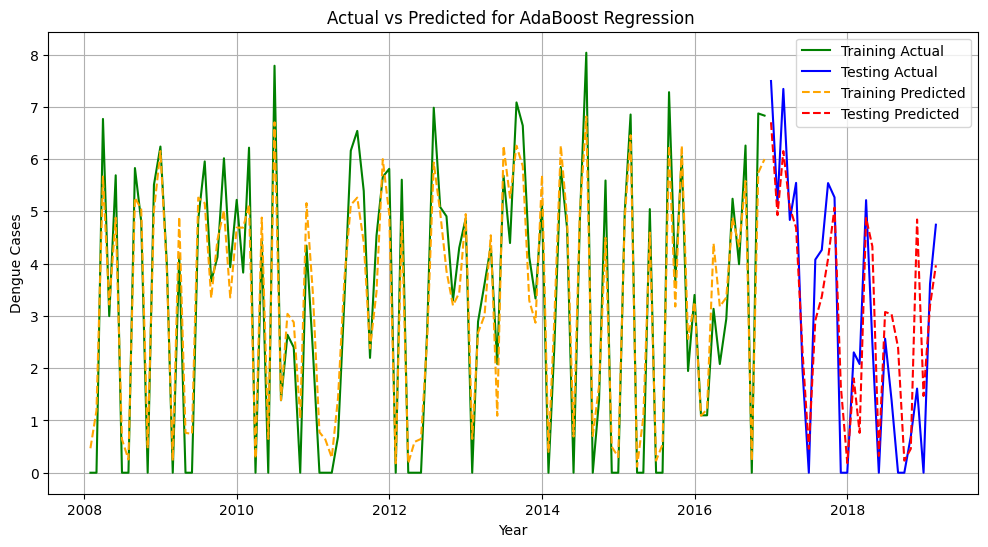

1/1 [==============================] - 0s 19ms/step
Neural Network Regression - Training Mean Squared Error: 95379.56308293236, Training R^2 Score: 0.5369090316776839
Neural Network Regression - Testing Mean Squared Error: 23843.46864285445, Testing R^2 Score: 0.8713937114700032


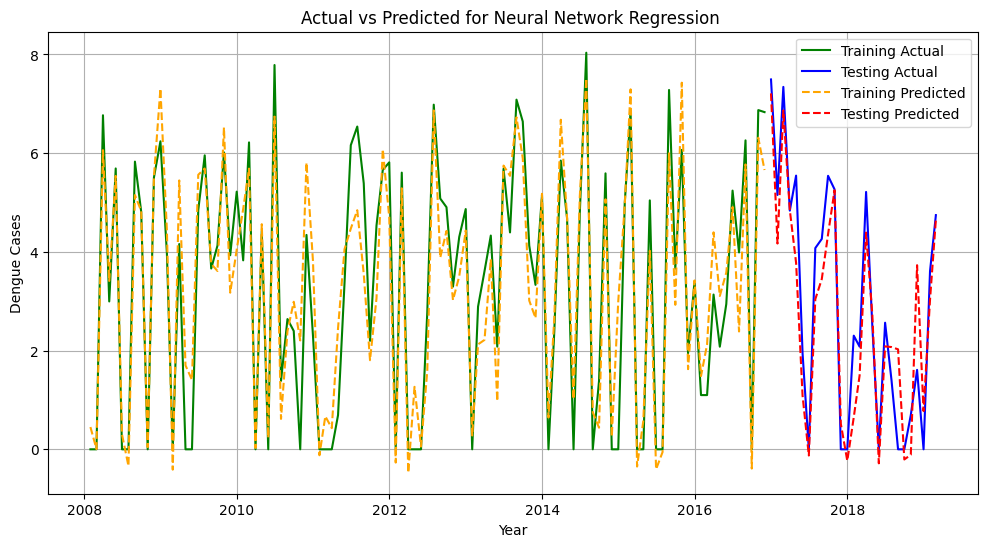

1/1 [==============================] - 0s 19ms/step
LSTM Regression - Training Mean Squared Error: 311733.17661604704, Training R^2 Score: -0.5135403639015974
LSTM Regression - Testing Mean Squared Error: 12081.465411677362, Testing R^2 Score: 0.9348353022845528


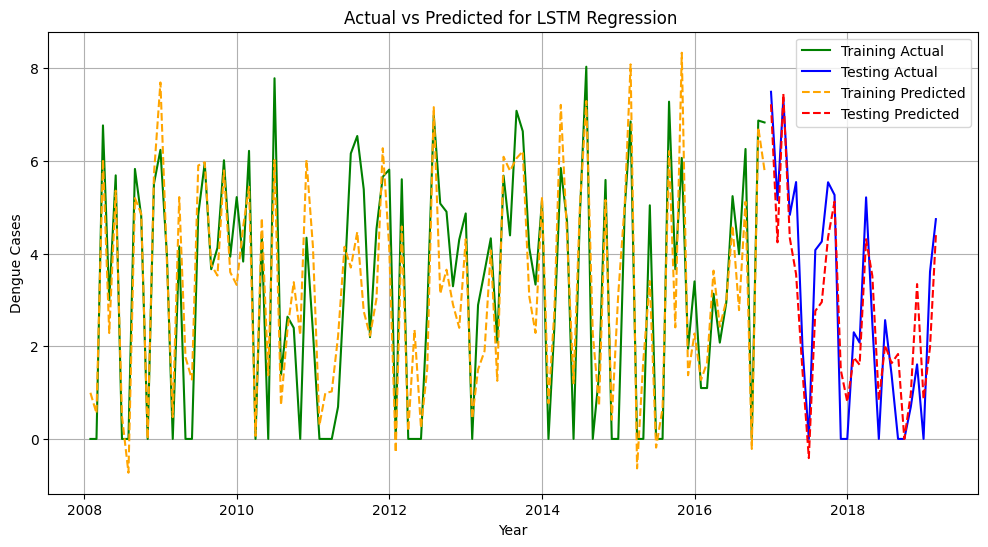

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("DengueAndClimateBangladesh.csv")

# Prepare data with datetime index
dates = pd.date_range(start='2008-01-01', periods=len(df), freq='M')
df['Date'] = dates
df.set_index('Date', inplace=True)

# Separate predictor variables (X) and target variable (y)
X = df[['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y = df['DENGUE']

# Apply log transformation to the target variable
y_log = np.log1p(y)  # Using log1p to avoid issues with log(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Initialize a scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to inverse-transform the predictions
def inverse_transform_predictions(y_pred_log):
    return np.expm1(y_pred_log)

# Function to print results
def print_results(name, y_train_pred_log, y_test_pred_log):
    y_train_pred = inverse_transform_predictions(y_train_pred_log)
    y_test_pred = inverse_transform_predictions(y_test_pred_log)
    y_train_original = inverse_transform_predictions(y_train)
    y_test_original = inverse_transform_predictions(y_test)

    mse_train = mean_squared_error(y_train_original, y_train_pred)
    r2_train = r2_score(y_train_original, y_train_pred)
    mse_test = mean_squared_error(y_test_original, y_test_pred)
    r2_test = r2_score(y_test_original, y_test_pred)

    print(f'{name} - Training Mean Squared Error: {mse_train}, Training R^2 Score: {r2_train}')
    print(f'{name} - Testing Mean Squared Error: {mse_test}, Testing R^2 Score: {r2_test}')

# Function to plot actual vs predicted with year information and training data
def plot_actual_vs_predicted_with_training(actual_train, actual_test, predicted_train, predicted_test, model_name, log_transform=False):
    plt.figure(figsize=(12,6))
    plt.plot(df.index[:len(actual_train)], actual_train.values, label='Training Actual', color='green')
    plt.plot(df.index[len(actual_train):len(actual_train)+len(actual_test)], actual_test.values, label='Testing Actual', color='blue')
    plt.plot(df.index[:len(predicted_train)], predicted_train, label='Training Predicted', linestyle='--', color='orange')
    plt.plot(df.index[len(predicted_train):len(predicted_train)+len(predicted_test)], predicted_test, label='Testing Predicted', linestyle='--', color='red')
    plt.xlabel('Year')
    plt.ylabel('Dengue Cases')
    plt.title(f'Actual vs Predicted for {model_name} {"(Log Transformed)" if log_transform else ""}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_train_pred_log_lr = lr_model.predict(X_train_scaled)
y_test_pred_log_lr = lr_model.predict(X_test_scaled)
print_results('Linear Regression', y_train_pred_log_lr, y_test_pred_log_lr)
plot_actual_vs_predicted_with_training(y_train, y_test, y_train_pred_log_lr, y_test_pred_log_lr, 'Linear Regression')

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_train_pred_log_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_log_ridge = ridge_model.predict(X_test_scaled)
print_results('Ridge Regression', y_train_pred_log_ridge, y_test_pred_log_ridge)
plot_actual_vs_predicted_with_training(y_train, y_test, y_train_pred_log_ridge, y_test_pred_log_ridge, 'Ridge Regression')

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)
y_train_pred_log_dt = dt_model.predict(X_train_scaled)
y_test_pred_log_dt = dt_model.predict(X_test_scaled)
print_results('Decision Tree Regression', y_train_pred_log_dt, y_test_pred_log_dt)
plot_actual_vs_predicted_with_training(y_train, y_test, y_train_pred_log_dt, y_test_pred_log_dt, 'Decision Tree Regression')

# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_train_pred_log_svr = svr_model.predict(X_train_scaled)
y_test_pred_log_svr = svr_model.predict(X_test_scaled)
print_results('Support Vector Regression', y_train_pred_log_svr, y_test_pred_log_svr)
plot_actual_vs_predicted_with_training(y_train, y_test, y_train_pred_log_svr, y_test_pred_log_svr, 'Support Vector Regression')

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_train_pred_log_rf = rf_model.predict(X_train_scaled)
y_test_pred_log_rf = rf_model.predict(X_test_scaled)
print_results('Random Forest Regression', y_train_pred_log_rf, y_test_pred_log_rf)
plot_actual_vs_predicted_with_training(y_train, y_test, y_train_pred_log_rf, y_test_pred_log_rf, 'Random Forest Regression')

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_pred_log_poly = poly_model.predict(X_train_poly)
y_test_pred_log_poly = poly_model.predict(X_test_poly)
print_results('Polynomial Regression', y_train_pred_log_poly, y_test_pred_log_poly)
plot_actual_vs_predicted_with_training(y_train, y_test, y_train_pred_log_poly, y_test_pred_log_poly, 'Polynomial Regression')

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_train_pred_log_gb = gb_model.predict(X_train_scaled)
y_test_pred_log_gb = gb_model.predict(X_test_scaled)
print_results('Gradient Boosting Regression', y_train_pred_log_gb, y_test_pred_log_gb)
plot_actual_vs_predicted_with_training(y_train, y_test, y_train_pred_log_gb, y_test_pred_log_gb, 'Gradient Boosting Regression')

# AdaBoost Regression
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train_scaled, y_train)
y_train_pred_log_ada = ada_model.predict(X_train_scaled)
y_test_pred_log_ada = ada_model.predict(X_test_scaled)
print_results('AdaBoost Regression', y_train_pred_log_ada, y_test_pred_log_ada)
plot_actual_vs_predicted_with_training(y_train, y_test, y_train_pred_log_ada, y_test_pred_log_ada, 'AdaBoost Regression')

# Neural Network Regression
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Predict on the training and testing sets
y_train_pred_log_nn = nn_model.predict(X_train_scaled).flatten()
y_test_pred_log_nn = nn_model.predict(X_test_scaled).flatten()
print_results('Neural Network Regression', y_train_pred_log_nn, y_test_pred_log_nn)
plot_actual_vs_predicted_with_training(y_train, y_test, y_train_pred_log_nn, y_test_pred_log_nn, 'Neural Network Regression')

# LSTM Regression
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(1, X_train_scaled.shape[1]), activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=0)

# Predict on the training and testing sets
y_train_pred_log_lstm = lstm_model.predict(X_train_lstm).flatten()
y_test_pred_log_lstm = lstm_model.predict(X_test_lstm).flatten()
print_results('LSTM Regression', y_train_pred_log_lstm, y_test_pred_log_lstm)
plot_actual_vs_predicted_with_training(y_train, y_test, y_train_pred_log_lstm, y_test_pred_log_lstm, 'LSTM Regression')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, ccf
import statsmodels.api as sm
from scipy.stats import pearsonr
from tabulate import tabulate
import seaborn as sns

# Load the dataset
file_path = 'DengueAndClimateBangladesh.csv'
data = pd.read_csv(file_path)

# Columns in the dataset
dengue_cases = data['DENGUE']
climate_variables = ['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']

# Function to calculate correlation and p-value
def calculate_correlation(x, y):
    corr, p_value = pearsonr(x, y)
    return corr, p_value

# Prepare the table
table = []

# Calculate correlations and cross-correlations
for variable in climate_variables:
    row = [variable]
    corr, p_value = calculate_correlation(dengue_cases, data[variable])
    row.extend([round(corr, 3), '<0.0001' if p_value < 0.0001 else round(p_value, 4)])

    for lag in range(1, 4):
        cross_corr_values = ccf(dengue_cases, data[variable], adjusted=False)[:2*lag+1]
        cross_corr = cross_corr_values[lag]
        cross_corr_p_value = sm.tsa.acf(data[variable], nlags=lag, qstat=True, fft=True)[2]
        row.extend([round(cross_corr, 3), '<0.0001' if cross_corr_p_value[lag-1] < 0.0001 else round(cross_corr_p_value[lag-1], 4)])

    table.append(row)

# Add the auto-correlation for dengue cases
auto_corr_values = sm.tsa.acf(dengue_cases, nlags=3)
auto_corr_p_values = sm.tsa.acf(dengue_cases, nlags=3, qstat=True, fft=True)[2]
table.append(['Lag Cases (Auto correlation)', 1, '<0.0001'] + [round(auto_corr_values[lag], 3) for lag in range(1, 4)] + ['<0.0001' for _ in range(3)])

# Create a DataFrame for better visualization
columns = ['Predictor', 'Correlation (Lag-0)', 'p-value (Lag-0)', 'Cross correlation (Lag-1)', 'p-value (Lag-1)',
           'Cross correlation (Lag-2)', 'p-value (Lag-2)', 'Cross correlation (Lag-3)', 'p-value (Lag-3)']
df_table = pd.DataFrame(table, columns=columns)

# Display the table
print(tabulate(df_table, headers='keys', tablefmt='grid'))

+----+------------------------------+-----------------------+-------------------+-----------------------------+-------------------+-----------------------------+-------------------+-----------------------------+-------------------+
|    | Predictor                    |   Correlation (Lag-0) | p-value (Lag-0)   |   Cross correlation (Lag-1) | p-value (Lag-1)   |   Cross correlation (Lag-2) | p-value (Lag-2)   | Cross correlation (Lag-3)   | p-value (Lag-3)   |
+====+==============================+=======================+===================+=============================+===================+=============================+===================+=============================+===================+
|  0 | MIN                          |                 0.301 | 0.0004            |                       0.398 | <0.0001           |                       0.403 | <0.0001           | 0.347                       | <0.0001           |
+----+------------------------------+-----------------------+-----------

In [ ]:
data.describe()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,2013.089552,6.425373,20.943415,30.848480,80.115577,27.840582,211.582090
std,3.233896,3.493015,4.830249,2.851090,5.253859,98.393795,451.214606
min,2008.000000,1.000000,10.597946,23.522676,67.548387,0.000000,0.000000
25%,2010.000000,3.000000,16.404490,29.277935,77.188214,0.547765,0.000000
50%,2013.000000,6.000000,22.935495,31.987028,80.093810,6.008095,36.000000
75%,2016.000000,9.000000,25.278970,32.676912,84.778111,12.774048,187.000000
max,2019.000000,12.000000,26.485821,35.769333,88.384071,689.161290,3087.000000


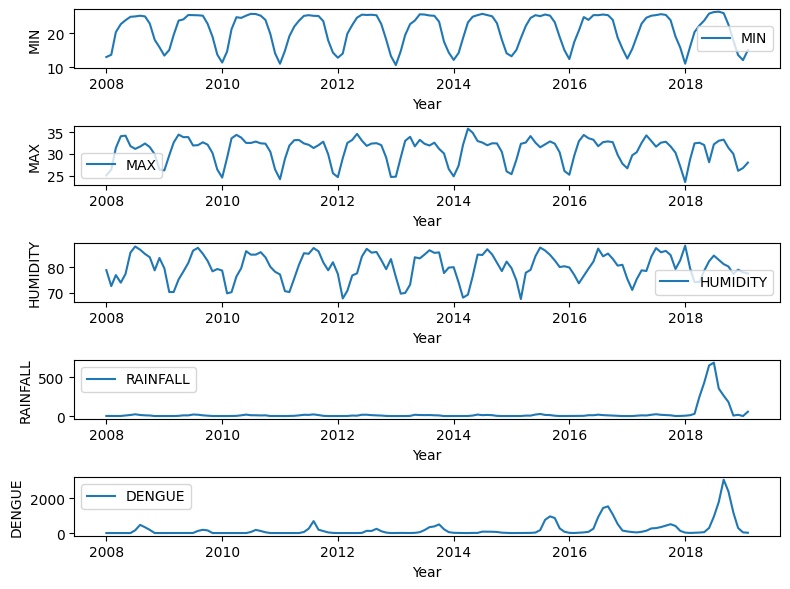

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/DengueAndClimateBangladesh.csv"
data = pd.read_csv(file_path)

# Convert 'YEAR' and 'MONTH' columns to a datetime format for easier plotting
data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))

# Plotting each variable over time
variables = ['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'DENGUE']
plt.figure(figsize=(8, 6))

for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    plt.plot(data['DATE'], data[var], label=var)
    plt.xlabel('Year')
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()


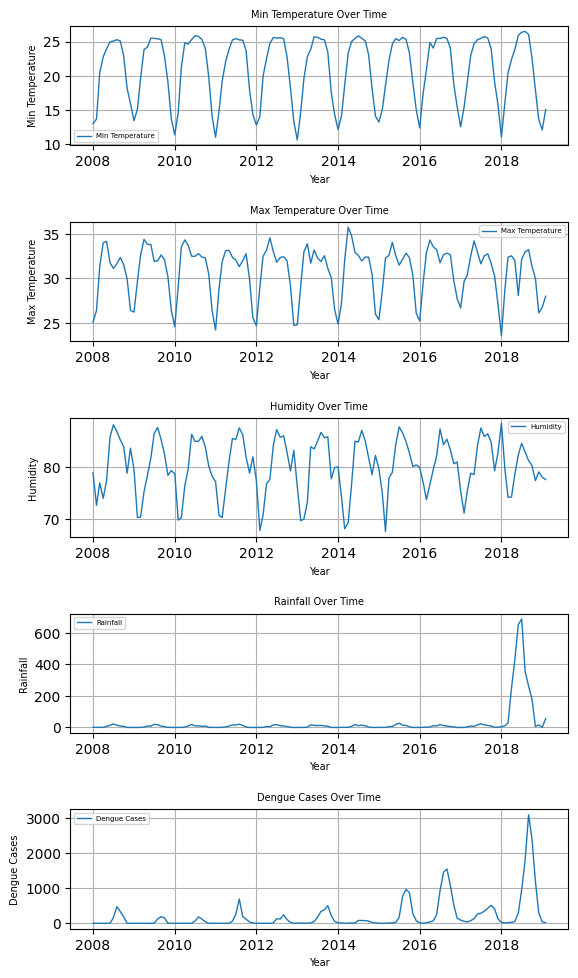

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "DengueAndClimateBangladesh.csv"  # Update with your local path if needed
data = pd.read_csv(file_path)

# Convert 'YEAR' and 'MONTH' columns to a datetime format for easier plotting
data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))

# Plotting each variable over time
variables = {
    'MIN': 'Min Temperature',
    'MAX': 'Max Temperature',
    'HUMIDITY': 'Humidity',
    'RAINFALL': 'Rainfall',
    'DENGUE': 'Dengue Cases'
}

# Extend layout size and create spacing
plt.figure(figsize=(6, 2 * len(variables)))  # Extend height for better spacing

for i, (var, display_name) in enumerate(variables.items(), 1):
    plt.subplot(len(variables), 1, i)
    plt.plot(data['DATE'], data[var], label=display_name, linewidth=1)
    plt.xlabel('Year', fontsize=7)
    plt.ylabel(display_name, fontsize=7)
    plt.title(f"{display_name} Over Time", fontsize=7)
    plt.legend(fontsize=5)
    plt.grid(True)

# Add more space between plots
plt.tight_layout(pad=1.5)  # Increase pad for more spacing
plt.savefig('extended_variable_trends.png', dpi=200)
plt.show()


[  86.64   94.85  114.35 1158.25 1163.75 1194.03 1455.5  1538.73 1588.3
 1600.04  758.86  615.42]


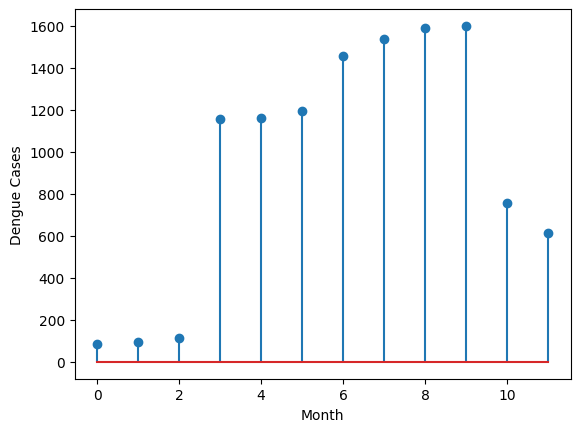

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the provided CSV file
file_path = '/content/DengueAndClimateBangladesh.csv'
data = pd.read_csv(file_path)

# Apply log transformation to relevant features
data_log_transformed = data.copy()
data_log_transformed[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']] = np.log1p(data[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']])

# Define the new_data DataFrame again
new_data = pd.DataFrame({
    'YEAR': [2024] * 12,
    'MONTH': list(range(1, 13)),
    'MIN': [12.0, 16.0, 22.5, 28.5, 29.7, 30.0, 30.5, 31.0, 30.0, 28.5, 22.0, 18.0],
    'MAX': [30.0, 31.7, 32.5, 33.5, 34.7, 36.0, 35.5, 34.8, 35.4, 33.5, 28.8, 27.7],
    'HUMIDITY': [87.0, 85.0, 82.5, 65.5, 58.0, 55.0, 63.5, 62.0, 65.0, 68.5, 72.0, 74.0],
    'RAINFALL': [0.0, 0.0, 3.0, 5.0, 7.0, 20.0, 28.0, 50.0, 16.0, 15.0, 2.0, 0.0]
})

# Apply log transformation to the new data
new_data_log_transformed = new_data.copy()
new_data_log_transformed[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']] = np.log1p(new_data[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']])

# Prepare the feature matrix and target vector
X = data_log_transformed[['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y = data_log_transformed['DENGUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the new data
predictions = model.predict(new_data_log_transformed[['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL']])

# Output the predictions
print(predictions)
plt.stem(predictions)
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("/content/DengueAndClimateBangladesh (1).csv")

# Separate predictor variables (X) and target variable (y)
X = df[['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y = df['DENGUE']

# Add constant for intercept term
X = sm.add_constant(X)

# Fit the model using LMedS
model = sm.RLM(y, X, M=sm.robust.norms.TrimmedMean(0.5))
results = model.fit()

# Print the summary of the model
print(results.summary())

# Calculate R^2
y_pred = results.predict(X)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)
print("R^2:", r_squared)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Read the dataset
df = pd.read_csv("/content/DengueAndClimateBangladesh (1).csv")

# Extracting independent and dependent variables
X = df[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y = df['DENGUE']

# Adding constant for the intercept
X = sm.add_constant(X)

# Performing robust linear regression
rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()

# Print summary
print(rlm_results.summary())

# Calculate R^2
y_pred = rlm_results.predict(X)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - y_pred)**2)
r_squared = 1 - (ss_residual / ss_total)
print("R^2:", r_squared)
